In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers, regularizers

In [8]:
train=pd.read_csv('SQLIV3_cleaned2.csv')
test=pd.read_csv('sqliv2_utf8.csv')


In [9]:
train.Label.value_counts()


Label
0    19268
1    11346
Name: count, dtype: int64

In [10]:
hidden_units1=512
hidden_units2=256
hidden_units3=128
learning_rate=0.01
hidden_layer_act='relu'
output_layer_act='sigmoid'
no_epochs=27

In [11]:
model = Sequential()


In [12]:

model.add(Dense(hidden_units1, input_dim=3000, activation=hidden_layer_act))
model.add(Dense(hidden_units2, activation=hidden_layer_act))
model.add(Dense(hidden_units3, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))  # Couche de sortie

c:\Users\ASUS ROG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [14]:
train.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [15]:
train_x = train['Sentence'].values
train_y = train['Label'].values

##test_x = test['Sentence'].values
##test_y = test['Label'].values

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
train_x = vectorizer.fit_transform(train_x).toarray()



In [17]:
history = model.fit(train_x, train_y, epochs=no_epochs, batch_size=32, verbose=2, validation_split=0.2)


Epoch 1/27
766/766 - 7s - 10ms/step - accuracy: 0.6468 - loss: 0.6659 - val_accuracy: 0.9998 - val_loss: 0.6301
Epoch 2/27
766/766 - 6s - 8ms/step - accuracy: 0.8717 - loss: 0.5605 - val_accuracy: 0.9301 - val_loss: 0.5533
Epoch 3/27
766/766 - 6s - 8ms/step - accuracy: 0.9372 - loss: 0.2756 - val_accuracy: 0.9775 - val_loss: 0.2265
Epoch 4/27
766/766 - 8s - 10ms/step - accuracy: 0.9555 - loss: 0.1401 - val_accuracy: 0.9747 - val_loss: 0.1459
Epoch 5/27
766/766 - 6s - 7ms/step - accuracy: 0.9630 - loss: 0.1009 - val_accuracy: 0.9786 - val_loss: 0.0906
Epoch 6/27
766/766 - 6s - 7ms/step - accuracy: 0.9716 - loss: 0.0805 - val_accuracy: 0.9786 - val_loss: 0.0745
Epoch 7/27
766/766 - 6s - 7ms/step - accuracy: 0.9800 - loss: 0.0675 - val_accuracy: 0.9766 - val_loss: 0.0740
Epoch 8/27
766/766 - 6s - 8ms/step - accuracy: 0.9857 - loss: 0.0588 - val_accuracy: 0.9716 - val_loss: 0.0898
Epoch 9/27
766/766 - 6s - 8ms/step - accuracy: 0.9891 - loss: 0.0521 - val_accuracy: 0.9833 - val_loss: 0.0457

In [18]:
# Affichage de la loss et accuracy après l'entraînement
print("Final Training Loss:", history.history['loss'][-1])
print("Final Training Accuracy:", history.history['accuracy'][-1])



Final Training Loss: 0.030359432101249695
Final Training Accuracy: 0.9940794706344604


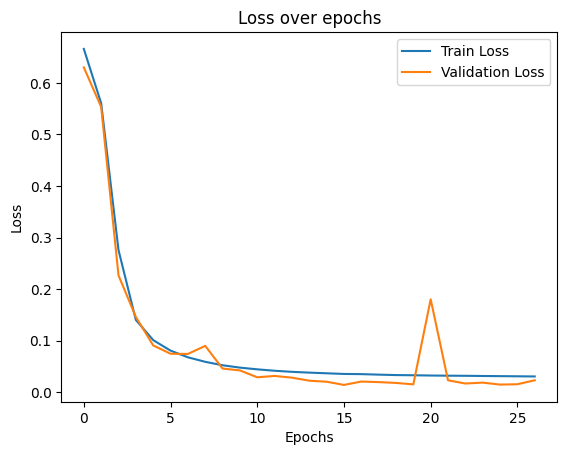

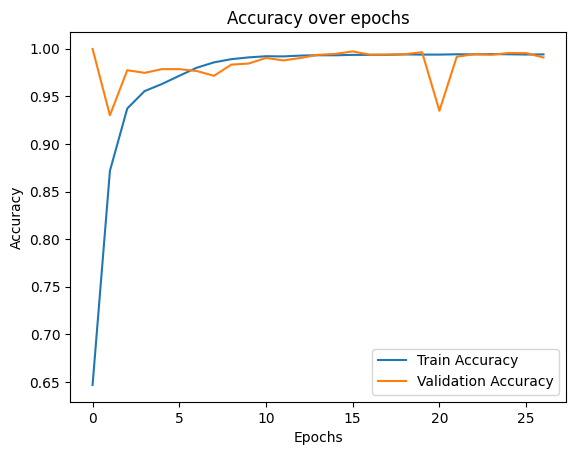

In [19]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
test_x = test['Sentence'].values
test_y = test['Label'].values
print(test.isnull().sum())


Sentence    3
Label       0
dtype: int64


In [21]:
test = test.dropna(subset=['Sentence'])



In [22]:
# Filtrer les lignes où Label == 1
filtered = test[test['Label'] == 1]

# Récupérer les 1000 exemples dans test_x et test_y
test_x = filtered['Sentence'].values
test_y = filtered['Label'].values


test_x = vectorizer.transform(test_x).toarray()

In [23]:
predictions = model.predict(test_x)


358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [24]:
# Convertir les probabilités en classes binaires
predicted_classes = (predictions >= 0.5).astype(int)

# Afficher les 20 premières prédictions
print(predicted_classes.flatten())


[1 1 1 ... 1 1 1]


In [25]:
# Compter le nombre de prédictions égales à 1
nombre_de_sql_injections = (predicted_classes == 1).sum()

print(f"Nombre de requêtes détectées comme SQL injection : {nombre_de_sql_injections}")


Nombre de requêtes détectées comme SQL injection : 11314


In [26]:
test.Label.value_counts()


Label
0    22304
1    11453
Name: count, dtype: int64

In [27]:
print(f"accuracy aprés tester avec le deuxiéme dataset avec les injection sql est = {nombre_de_sql_injections/len(test_x)}")

accuracy aprés tester avec le deuxiéme dataset avec les injection sql est = 0.9878634418929538


In [28]:
# Filtrer les lignes où Label == 1
filtered2 = test[test['Label'] == 0]

# Récupérer les 1000 exemples dans test_x et test_y
test_x2 = filtered2['Sentence'].values
test_y2 = filtered2['Label'].values


test_x2 = vectorizer.transform(test_x2).toarray()

In [29]:
predictions2 = model.predict(test_x2)


697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [30]:
# Convertir les probabilités en classes binaires
predicted_classes2 = (predictions2 >= 0.5).astype(int)

# Afficher les 20 premières prédictions
print(predicted_classes2.flatten())


[0 0 0 ... 0 0 0]


In [31]:
# Compter le nombre de prédictions égales à 1
nombre_de_non_sql_injections = (predicted_classes2 == 0).sum()

print(f"Nombre de requêtes non détectées comme SQL injection : {nombre_de_non_sql_injections}")


Nombre de requêtes non détectées comme SQL injection : 22053


In [32]:
test.Label.value_counts()


Label
0    22304
1    11453
Name: count, dtype: int64

In [34]:
print(f"accuracy apres testé avec le deuxiéme datset avec les non sql injection est ={nombre_de_non_sql_injections/len(test_x2)} ")

accuracy apres testé avec le deuxiéme datset avec les non sql injection est =0.9887464131994261 
